In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as c

#Make np arrays print in scientific notation:
np.set_printoptions(formatter={'float': lambda x: format(x, '9.4E')})
#Make numbers display in exponential form:
%precision %e

u'%e'

In [2]:
indx, halomass, haloradius, vmax, xpos, y, z, v_x, v_y, v_z = np.loadtxt (
    "halo_bolshoi_z0.00_D360.dat", unpack=True)
#halo mass per 250/0.7 cubic megaparsecs

In [3]:
#Output the arrays in a columnated format so I can see what I'm working with
np.savetxt("columnated.txt",zip(indx,halomass,haloradius,vmax,xpos, y, z, v_x,
                         v_y, v_z), fmt='%30.8f')

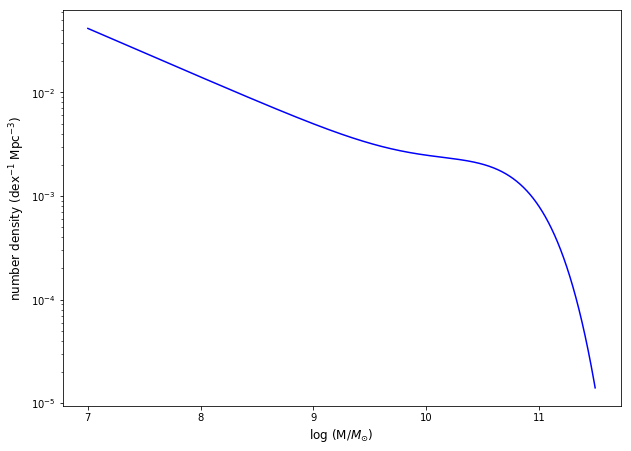

In [25]:
#CALCULATING AND PLOTTING THE GALAXY MASS DENSITY FUNCTION

m_ast = 10.**10.66 #M* in solar mass
phi_ast1 = 3.96*10.**-3. #Mpc^-3
alpha1 = -0.35
phi_ast2 = 0.79*10.**-3. #Mpc^-3
alpha2 = -1.47

logmratio = np.linspace(7,11.5,1000) #Log of Galaxy mass to solar mass
m = 10**logmratio #galaxy mass in solar mass
phi = np.exp(-m/m_ast)*(phi_ast1*(m/m_ast)**alpha1+phi_ast2*(m/m_ast)
                        **alpha2)/m_ast*m

fig=plt.figure(figsize=(10,16))

galaxymassplt=fig.add_subplot(2,1,1)

galaxymassplt.semilogy(logmratio,phi,'b-')
galaxymassplt.set_ylabel('number density (dex$^{-1}$ Mpc$^{-3}$)',fontsize=12)
galaxymassplt.set_xlabel('log (M/$M_{\odot}$)',fontsize=12)

plt.show()

halofreq:
[0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00
 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00
 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00
 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00
 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00
 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00
 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00
 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00
 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00
 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00
 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00
 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00
 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00
 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00
 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E+00 0.0000E

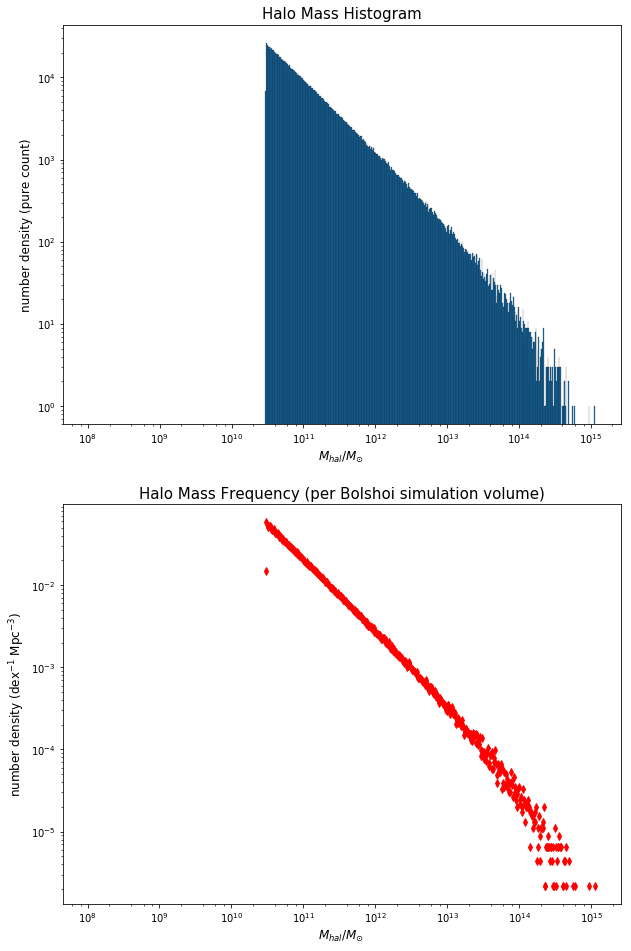

In [5]:
#BINNING AND PLOTTING HALO MASS DENSITIES

binsize=0.01 #Bin size in units of dex
#Creating the bins, which span from 8 dex to 15.06 dex:
bins=np.logspace(8,15.06,(15.06-8.)/binsize+1) #non-exponential bins (Add 1 to the num arg because the elements include the starting point.)
logbins=np.log10(bins) #bins in dex units

fig=plt.figure(figsize=(10,25))

halomassplot=fig.add_subplot(3,1,1)
halofreq, binsout, patches = halomassplot.hist(halomass,bins=bins,edgecolor='k',linewidth=0.2)
halomassplot.set_xscale('log')
halomassplot.set_yscale('log')
halomassplot.set_ylabel('number density (pure count)',fontsize=12)
halomassplot.set_xlabel('$M_{hal}/M_{\odot}$',fontsize=12)
halomassplot.set_title('Halo Mass Histogram',fontsize=15)

halofreq=halofreq/(250./0.7)**3./binsize #frequency per cubic Megaparsec per dex (diving by bin size to make the function independent of binsize, dividing by 0.7 is dividing by h)
midbins = (binsout[1:]+binsout[:-1])/2.
logmidbins=np.log10(midbins)

dotplot=fig.add_subplot(3,1,2)
dotplot.plot(midbins,halofreq,'rd',markersize=5)
dotplot.set_xscale('log')
dotplot.set_yscale('log')
dotplot.set_ylabel('number density (dex$^{-1}$ Mpc$^{-3}$)',fontsize=12)
dotplot.set_xlabel('$M_{hal}/M_{\odot}$',fontsize=12)
dotplot.set_title('Halo Mass Frequency (per Bolshoi simulation volume)',fontsize=15)

##Debugging
print 'halofreq:'
print halofreq
##End debugging

plt.show()

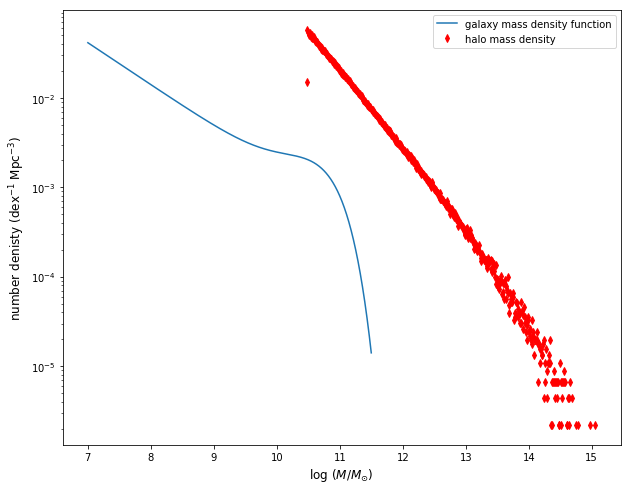

In [6]:
#PLOT THE GALAXY AND HALO MASS DENSITY FUNCTIONS ON THE SAME PLOT WITHOUT ANY AXES MANIPUATIONS

plt.figure(figsize=(10,8))

plt.semilogy(logmratio,phi,label='galaxy mass density function') #Plot the galaxy mass function
plt.xlabel('log ($M/M_{\odot}$)',fontsize=12)
plt.ylabel('number denisty (dex$^{-1}$ Mpc$^{-3}$)',fontsize=12)
plt.semilogy(logmidbins,halofreq,'rd',markersize=5,label='halo mass density')
plt.legend()
plt.show()

c:\python27\lib\site-packages\matplotlib\transforms.py:661: RuntimeWarning: invalid value encountered in absolute
  inside = ((abs(dx0 + dx1) + abs(dy0 + dy1)) == 0)


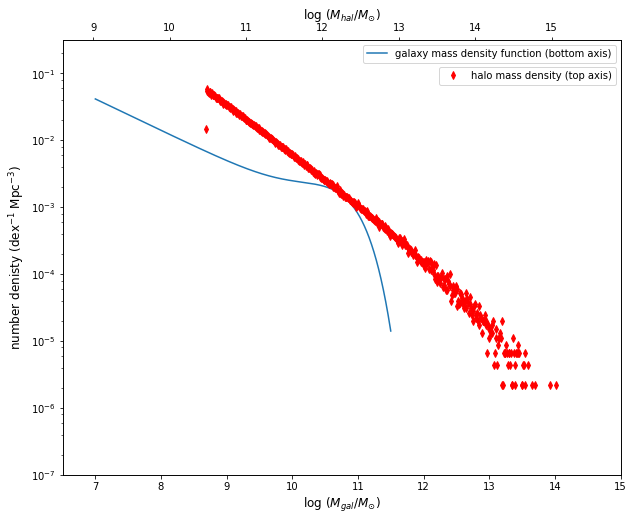

In [7]:
#PLOT THE HALO AND GALAXY MASS DENSITY FUNCTION ON THE SAME PLOT, MOVING THE HALO MASS FUNCTION TO THE LEFT

plt.figure(figsize=(10,8))

plt.semilogy(logmratio,phi,label='galaxy mass density function (bottom axis)') #Plot the galaxy mass function
plt.xlabel('log ($M_{gal}/M_{\odot}$)',fontsize=12)
plt.ylabel('number denisty (dex$^{-1}$ Mpc$^{-3}$)',fontsize=12)
plt.xlim(6.5,15)
plt.legend()

plt.twiny() #make a second x axis
plt.ylim(10.**-7.,10.**-0.5)

plt.semilogy(logmidbins,halofreq,'rd',markersize=5,label='halo mass density (top axis)')
plt.xlim(8.6,15.9) #setting xlim for halo function
plt.xlabel('log ($M_{hal}/M_{\odot}$)',fontsize=12)

plt.legend(bbox_to_anchor=[1,0.95])

plt.show()

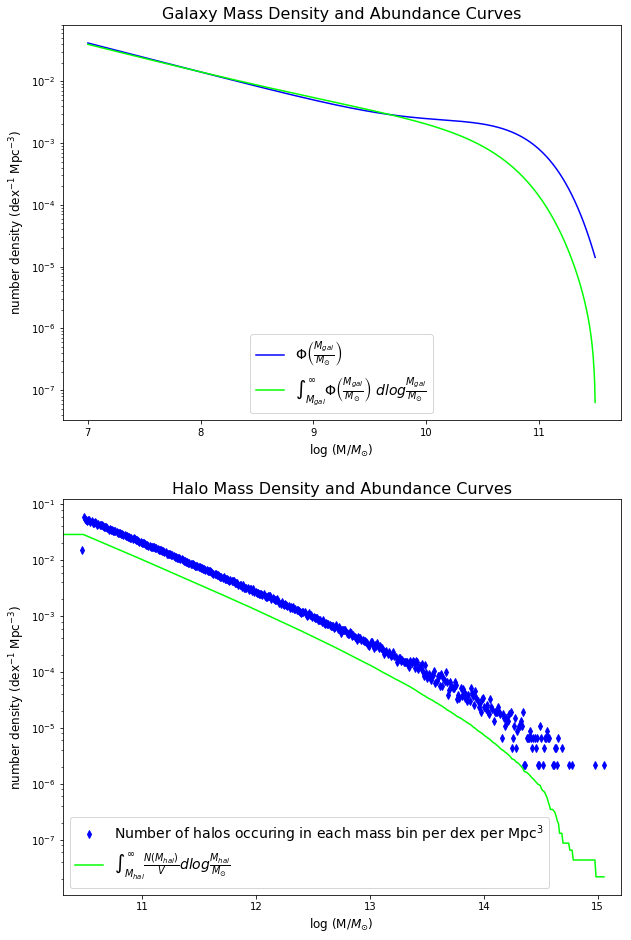

Okay: halofrequency integral from 0 to inf matches halomass array size.


In [24]:
#CREATE THE ABUNDANCE CURVE FOR GALAXY MASS
revphi = np.flip(phi,0) #reverse galaxy number density array so I can calculate the area as the integral from M_gal to inf
revlogmratio = np.flip(logmratio,0) #reverse the logmratio array so I can plot the area later in the code
dx_gal = (logmratio.max()-logmratio.min())/(len(logmratio))
sumdy_gal = np.array([revphi[:i].sum() for i in np.arange(1,len(phi)+1,1)])
galaxyarea=sumdy_gal*dx_gal

#Plotting galaxy
fig=plt.figure(figsize=(10,16))

galaxymassplt=fig.add_subplot(2,1,1)
galaxymassplt.semilogy(logmratio,phi,'b-', #Replot the galaxy mass density function created earlier
                      label='$\\Phi \\left(\\frac{M_{gal}}{M_{\\odot}} \\right)$')
galaxymassplt.set_ylabel('number density (dex$^{-1}$ Mpc$^{-3}$)',fontsize=12)
galaxymassplt.set_xlabel('log (M/$M_{\odot}$)',fontsize=12)
galaxymassplt.semilogy(revlogmratio,galaxyarea,color=(0,1,0), #Plot the area under the galaxy mass density function according to the integral from M_gal to inf
                       label='$\\int_{M_{gal}}^{\\infty}\\Phi \\left(\\frac{M_{gal}}{M_{\\odot}} \\right)\;'
                       'dlog\\frac{M_{gal}}{M_{\\odot}}$')
galaxymassplt.legend(fontsize=14,loc='lower center')
galaxymassplt.set_title('Galaxy Mass Density and Abundance Curves',fontsize=16)
                        
#CREATE THE ABUNDANCE CURVE FOR HALO MASS
revhalofreq = np.flip(halofreq,0) #reverse the halo frequency array so I can calculate the area as the integral from M_hal to infinity
revlogmidbins = np.flip(logmidbins,0) #reverse the logmidbins array so I can plot the area later in the code
sumdy_hal=np.array([revhalofreq[:i].sum() for i in np.arange(1,len(revhalofreq)+1,1)]) #Create an array of the sum of all frequencies/Mpc^3 from M_hal to infinity, using revhalofreq, which starts from the most massive halos and progresses to the least massive halos
haloarea=sumdy_hal*binsize #midpoint approximation of the the curve of integral of all Halo frequencies/Mpc^3 from M_hal to infinity

#Plotting halo
haloabundanceplt=fig.add_subplot(2,1,2)
haloabundanceplt.semilogy(logmidbins,halofreq,'bd',markersize=5,label='Number of halos occuring in each mass bin per dex per Mpc$^{3}$')
haloabundanceplt.semilogy(revlogmidbins,haloarea,color=(0,1,0),
                          label='$\\int_{M_{hal}}^{\infty}\\frac{N(M_{hal})}{V}dlog\\frac{M_{hal}}{M_{\odot}}$')
haloabundanceplt.set_xlabel('log (M/$M_{\odot}$)',fontsize=12)
haloabundanceplt.set_ylabel('number density (dex$^{-1}$ Mpc$^{-3}$)',fontsize=12)
haloabundanceplt.legend(fontsize=14)
haloabundanceplt.set_title('Halo Mass Density and Abundance Curves',fontsize=16)
haloabundanceplt.set_xlim(10.3,15.2)

plt.savefig('Abundance Curves.png')
plt.show()

#Perform a test:
roundeddigits=17
if round(halomass.size/(250./0.7)**3.,roundeddigits)==round(np.max(haloarea),roundeddigits): #Testing to make sure that the number of elements in the halomass array matches the integral from 0 to infinity. *TEST ROUNDED TO NEAREST 10^-17 BECAUSE OF ROUNDING ERRORS IN THE CALCULATION OF CUMULATIVE DENSITY IMPLIED BY HALOMASS ARRAY SIZE
    print"Okay: halofrequency integral from 0 to inf matches halomass array size."
else:
    print("Error: halofrequency integral from 0 to inf does not match halo array size."
          '\nCount implied by halo area: {0:0.20f}'
          '\nSize of halomass array: {1:0.20f}'
          '\nCumulative density implied by halomass size: {2:0.20e}'
          '\nMax of haloarea: {3:0.20e}'.format(np.max(haloarea)*(250./0.7)**3.,halomass.size,halomass.size/(250./0.7)**3.,
                                              np.max(haloarea)))
    

In [26]:
'''
FIXED---nlowerbound isn't working because I need the minimum of all numbers that aren't -inf.
ANOTHER problem is going to be that there are more than one instance of the minimum density in haloarea
BUT it's only until we hit another instance that one density repeats, because we're looking at the cumulative number density.
'''
nlowerbound = min(min(np.where(haloarea==0.0,1.0,haloarea)),min(galaxyarea)) #find the minimum of n_gal(>M_gal) and n_hal(>M_hal), which are the cumulative number densities for each, in units of Mpc^-3 dex^-1
nupperbound = max(max(haloarea),max(galaxyarea)) #find the maximum ...
nrange = np.logspace(np.log10(nlowerbound),np.log10(nupperbound),100) #create a logarithmically spaced array of densities in units of Mpc^-3 dex^-1 for which the program will find corresponsing >M_gal and >M_hal

##Debugging
print('min of halo area: {0:0.3e}'.format(min(haloarea)))
print('min of galaxy area: {0:0.3e}'.format(min(galaxyarea)))
print('min of both haloarea and galaxyarea: {0:0.3e}'.format(nrange[0]))
print('nlowerbound: {0:0.3e}'.format(nlowerbound))
print('log nlowerbound: {0:0.3e}'.format(np.log10(nlowerbound)))
print('max log halomass: {0:0.8f}'.format(np.log10(np.max(halomass))))
print'\nlog mid bins:'
print logmidbins
print'\nnrange:'
print nrange
print'\nhalo number densities:'
print haloarea
print'\nlog halo number densities:'
print np.log10(haloarea)
##End debugging

def lookup(lookupval,lookuparray,resultarray):
    n,i=0,0
    while n<lookupval:
        n=lookuparray[i]
        result=resultarray[i]
        print('i: {0:0.0f}'.format(i))
        print('log n: {0:0.3e}'.format(np.log10(n)))
        i+=1
        if i>1000:
            sys.exit("Timeout")
    return result

def populate(independentarray,lookuparray,resultsarray):
    dependentarray=np.array([]) #create a blank array in which to put the dependent parameters that correspond to the independent parameters
    for n in independentarray:
        dependentarray=np.append(dependentarray,lookup(n,lookuparray,resultsarray))
    return dependentarray

##Debugging
print''
print midbins.size
print haloarea.size
print halomass.size

'''Turning these off while debugging
mgal_corresponding_to_nrange=populate(nrange,galaxyarea,revlogmratio) #create an array of galaxy masses that correspond to the number densities in the nrange array
mhal_corresponding_to_nrange=populate(nrange,haloarea,revlogmidbins) #create an array of halo masses that correspond to the number densities in the nrange array
'''

i=20
print('\nlog nrange[{1:0.0f}] (lookup value): {0:0.2e}'.format(np.log10(nrange[i]),i))
#test=lookup(nrange[i],galaxyarea,revlogmratio) #a test, looking up the galaxy mass that corresponds to the number density nrange[i]
test=lookup(nrange[i],haloarea,revlogmidbins) #a test, looking up the halo mass that corresponds to the number density nrange[i]
print('galaxy mass corresponding to nrange[{1:0.0f}]: {0:0.2f}'.format(test,i))

'''Turning this debugging function off while not running the populate function
np.savetxt("galaxymasses.txt",zip(np.log10(nrange),nrange,mgal_corresponding_to_nrange), fmt='%20.3e')
'''

end=1 #Need this here so my last multiline comment won't print---Delete this later.

#mgal_corresponding_to_nrange=np.array([]) #create a blank array in which to put the galaxy masses that correspond to the number densities in the nrange array
#for i in nrange:
#     mgal_corresponding_to_nrange=np.append(mgal_corresponding_to_nrange,)

min of halo area: 2.195e-08
min of galaxy area: 6.341e-08
min of both haloarea and galaxyarea: 2.195e-08
nlowerbound: 2.195e-08
log nlowerbound: -7.659e+00
max log halomass: 15.05231680

log mid bins:
[8.0050E+00 8.0150E+00 8.0250E+00 8.0350E+00 8.0450E+00 8.0550E+00
 8.0650E+00 8.0750E+00 8.0850E+00 8.0950E+00 8.1050E+00 8.1150E+00
 8.1250E+00 8.1350E+00 8.1450E+00 8.1550E+00 8.1650E+00 8.1750E+00
 8.1850E+00 8.1950E+00 8.2050E+00 8.2150E+00 8.2250E+00 8.2350E+00
 8.2450E+00 8.2550E+00 8.2650E+00 8.2750E+00 8.2850E+00 8.2950E+00
 8.3050E+00 8.3150E+00 8.3250E+00 8.3350E+00 8.3450E+00 8.3550E+00
 8.3650E+00 8.3750E+00 8.3850E+00 8.3950E+00 8.4050E+00 8.4150E+00
 8.4250E+00 8.4350E+00 8.4450E+00 8.4550E+00 8.4650E+00 8.4750E+00
 8.4850E+00 8.4950E+00 8.5050E+00 8.5150E+00 8.5250E+00 8.5350E+00
 8.5450E+00 8.5550E+00 8.5650E+00 8.5750E+00 8.5850E+00 8.5950E+00
 8.6050E+00 8.6150E+00 8.6250E+00 8.6350E+00 8.6450E+00 8.6550E+00
 8.6650E+00 8.6750E+00 8.6850E+00 8.6950E+00 8.7050E+00 8.7150